In [115]:
import pandas as pd
import duckdb
import os
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [58]:
def importCsv(file_name):
    df = pd.read_csv(f'data/{file_name}.csv')
    return df


In [59]:
application_train = importCsv('application_train')
bureau = importCsv('bureau')
previous_application = importCsv("previous_application")

In [60]:
application_train


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
bureau.columns

Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE',
       'AMT_ANNUITY'],
      dtype='object')

In [62]:
list(application_train.columns)

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

In [63]:
colonnes_df1 = set(bureau.columns)
colonnes_df2 = set(application_train.columns)

colonnes_identiques = colonnes_df1.intersection(colonnes_df2)

# Convertissez l'ensemble en liste si nécessaire
colonnes_identiques_liste = list(colonnes_identiques)
print("Colonnes identiques :", colonnes_identiques_liste)

Colonnes identiques : ['SK_ID_CURR', 'AMT_ANNUITY']


In [64]:
print(bureau.duplicated().sum())
print(application_train.duplicated().sum())

0
0


<Axes: >

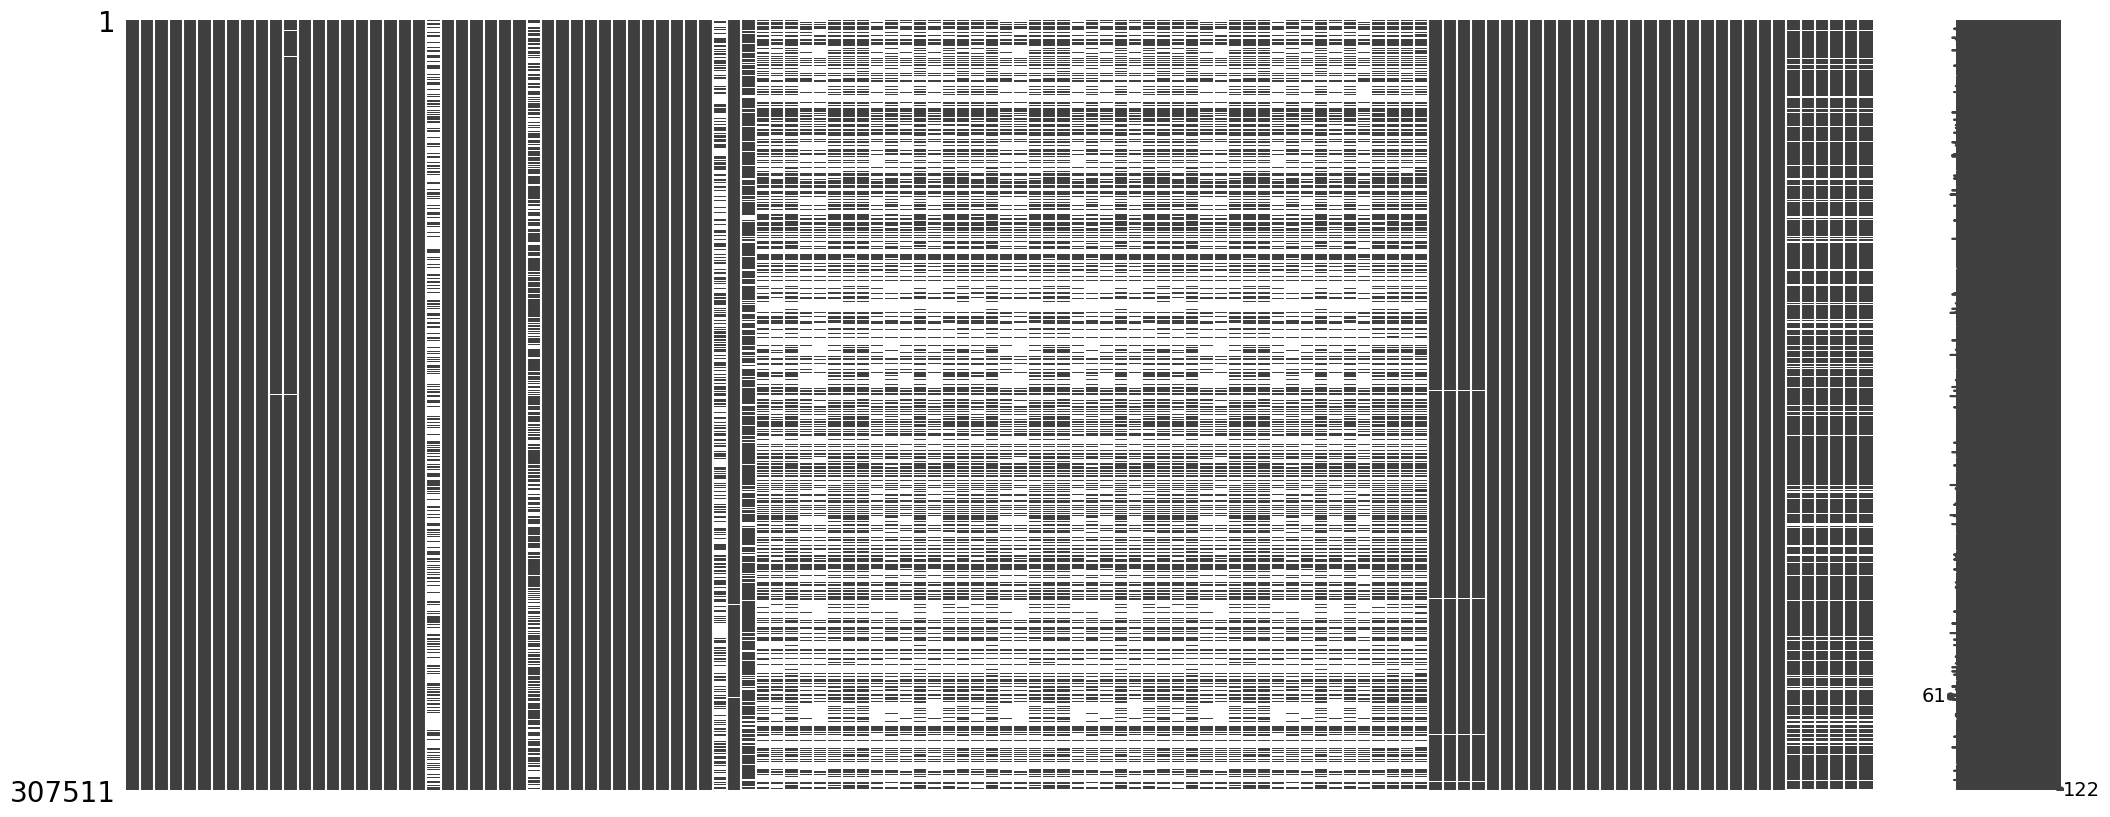

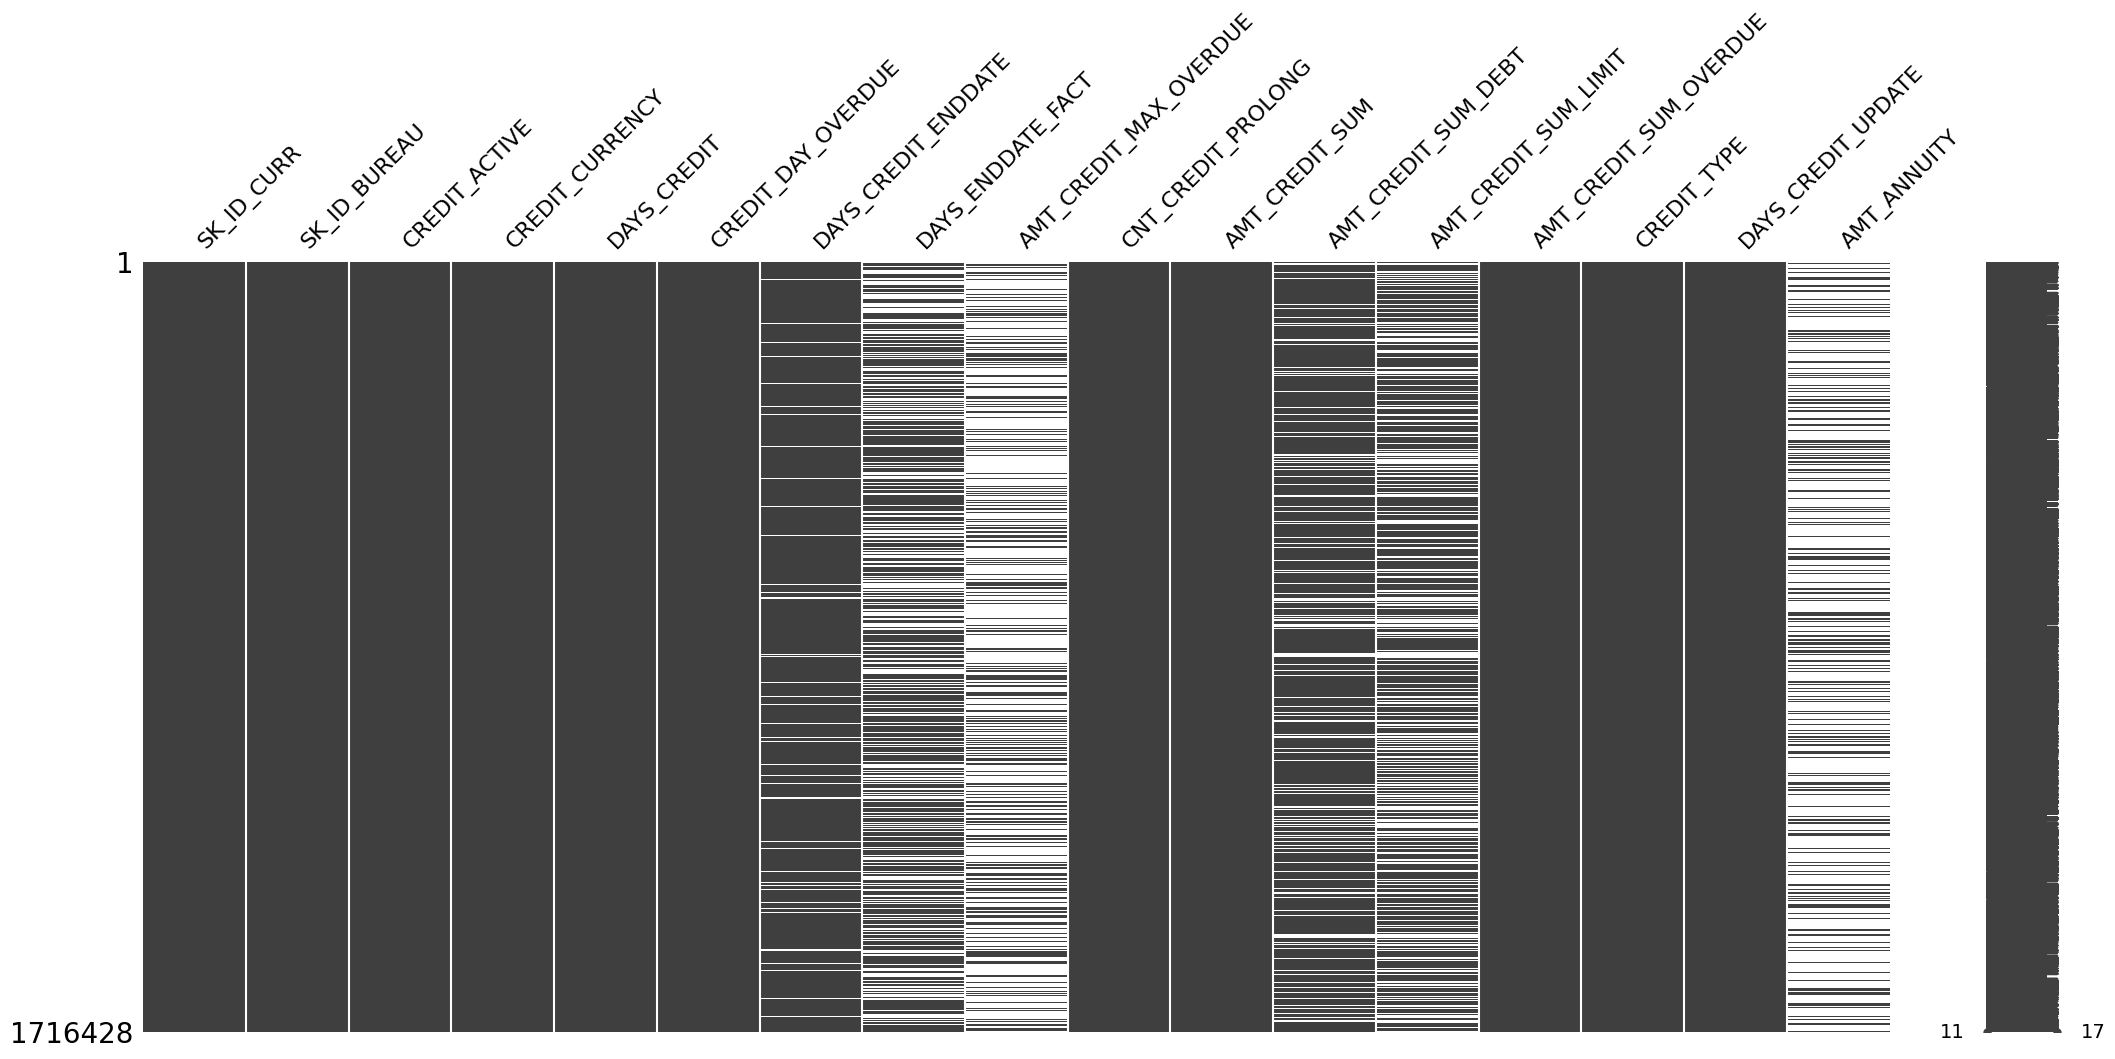

In [65]:
msno.matrix(application_train)
msno.matrix(bureau)

In [66]:
def nettoyageCol(df,seuil):

    nb_valeurs_manquantes = df.isnull().sum()
    proportion_valeurs_manquantes = nb_valeurs_manquantes / len(df)
    colonnes_a_supprimer = proportion_valeurs_manquantes[proportion_valeurs_manquantes > seuil].index
    df_sans_colonnes_manquantes = df.drop(columns=colonnes_a_supprimer)

    return df_sans_colonnes_manquantes

In [104]:
short_application_train = nettoyageCol(application_train,0.1)
short_bureau = nettoyageCol(bureau,0.3)

In [68]:
short_bureau.SK_ID_CURR.duplicated().sum()

1410617

In [69]:
# jointure de 3 dataset
previous_application = pd.read_csv("data/previous_application.csv")

In [70]:
short_previous_application = nettoyageCol(previous_application, 0.2)
short_previous_application.SK_ID_CURR.duplicated().sum()

1331357

In [71]:
# bigDF = application_train.merge(bureau, on='SK_ID_CURR', how='inner')

In [72]:
def colCommunes(df1:pd.DataFrame,df2:pd.DataFrame)->pd.DataFrame:
    colonnes_df1 = set(previous_application.columns)
    colonnes_df2 = set(application_train.columns)

    colonnes_identiques = colonnes_df1.intersection(colonnes_df2)

    # Convertissez l'ensemble en liste si nécessaire
    colonnes_identiques_liste = list(colonnes_identiques)
    print("Colonnes identiques :", colonnes_identiques_liste)

# filtrer et suppression des colonnes avec trop de données manquantes

### filtre des tables a joindre suppression des id clients non presents dans la table application_train mais presents dans les tables a jointre a cette dernière.

In [73]:
def verifier_correspondance_identifiants_clients(df1, colonne1, df2, colonne2):
    """
    Vérifie si les identifiants clients de la colonne 2 d'un DataFrame 2 sont présents dans la colonne 1 d'un DataFrame 1,
    même s'ils sont doublons.

    Args:
    - df1 : DataFrame Pandas 1
    - colonne1 : Nom de la colonne dans le DataFrame 1
    - df2 : DataFrame Pandas 2
    - colonne2 : Nom de la colonne dans le DataFrame 2

    Returns:
    - True si tous les identifiants clients de la colonne 2 de df2 sont présents dans la colonne 1 de df1, False sinon
    """
    # Récupérer tous les identifiants clients uniques de la colonne 1 de df1
    clients_df1 = set(df1[colonne1].dropna())

    # Récupérer tous les identifiants clients uniques de la colonne 2 de df2
    clients_df2 = set(df2[colonne2].dropna())

    # Vérifier si tous les identifiants clients de df2 sont présents dans df1
    if clients_df2.issubset(clients_df1):
        return True
    else:
        return False


In [74]:
def identifier_differences_identifiants_clients(df1, colonne1, df2, colonne2):
    """
    Identifie les identifiants clients uniques présents dans la colonne 2 d'un DataFrame 2 mais absents de la colonne 1 d'un DataFrame 1.

    Args:
    - df1 : DataFrame Pandas 1
    - colonne1 : Nom de la colonne dans le DataFrame 1
    - df2 : DataFrame Pandas 2
    - colonne2 : Nom de la colonne dans le DataFrame 2

    Returns:
    - Liste des identifiants clients uniques présents dans la colonne 2 de df2 mais absents dans la colonne 1 de df1
    """
    # Récupérer les identifiants clients uniques de la colonne 1 de df1
    clients_df1 = set(df1[colonne1].dropna())

    # Récupérer les identifiants clients uniques de la colonne 2 de df2
    clients_df2 = set(df2[colonne2].dropna())

    # Identifier les identifiants clients de df2 qui ne sont pas présents dans df1
    differences = clients_df2 - clients_df1

    return list(differences)

In [75]:
verifier_correspondance_identifiants_clients(short_application_train,"SK_ID_CURR",short_bureau,"SK_ID_CURR")

False

In [76]:
id_client_diff = identifier_differences_identifiants_clients(short_application_train,"SK_ID_CURR",short_bureau,"SK_ID_CURR")
somme_diff = sum(id_client_diff)
print('il y a : ', somme_diff ,'id_clients qui ne sont par present dans la table application_train')

il y a :  11747824128 id_clients qui ne sont par present dans la table application_train


In [77]:
def filtre_selon_application_train(df1, colonne1, df2, colonne2):
    """
    Supprime les lignes de df2 où les éléments de la colonne2 ne sont pas présents dans la colonne1 de df1.

    Args:
    - df1 : DataFrame Pandas 1
    - colonne1 : Nom de la colonne dans le DataFrame 1
    - df2 : DataFrame Pandas 2
    - colonne2 : Nom de la colonne dans le DataFrame 2

    Returns:
    - DataFrame Pandas 2 avec les lignes supprimées
    """
    # Obtenir les identifiants clients uniques de la colonne 1 de df1
    clients_df1 = set(df1[colonne1].dropna())

    # Filtrer df2 pour ne garder que les lignes où les éléments de la colonne 2 sont présents dans la colonne 1 de df1
    df2_filtre = df2[df2[colonne2].isin(clients_df1)]

    return df2_filtre


In [78]:
bureau_filtred = filtre_selon_application_train(short_application_train,'SK_ID_CURR',short_bureau,'SK_ID_CURR')
print('shape du df nouveau', bureau_filtred.shape)
print('shape du df ancien', bureau.shape)


shape du df nouveau (1465325, 13)
shape du df ancien (1716428, 17)


In [79]:
id_client_diff = identifier_differences_identifiants_clients(short_application_train,"SK_ID_CURR",short_previous_application,"SK_ID_CURR")
somme_diff = len(id_client_diff)
print('il y a : ', somme_diff ,'id_clients qui ne sont par present dans la table application_train')

il y a :  47800 id_clients qui ne sont par present dans la table application_train


In [80]:
previous_application_filtred = filtre_selon_application_train(short_application_train,'SK_ID_CURR',short_previous_application,'SK_ID_CURR')
print('shape du df nouveau', previous_application_filtred.shape)
print('shape du df ancien', previous_application.shape)

shape du df nouveau (1413701, 23)
shape du df ancien (1670214, 37)


<Axes: >

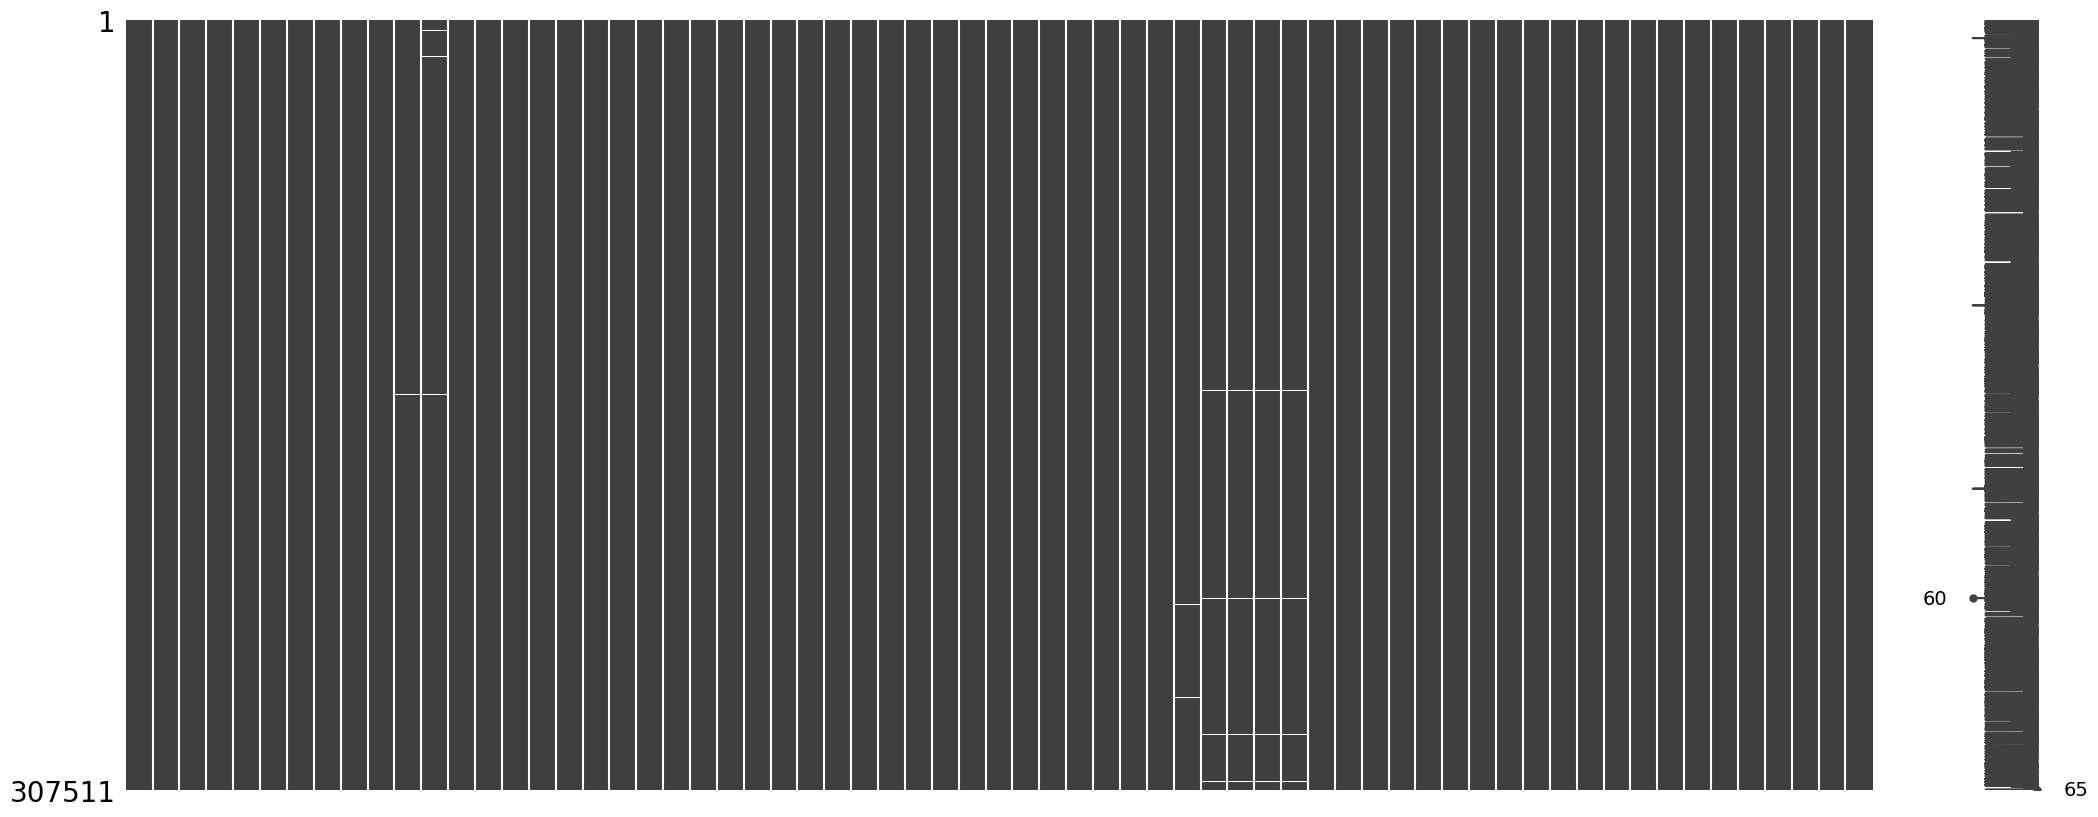

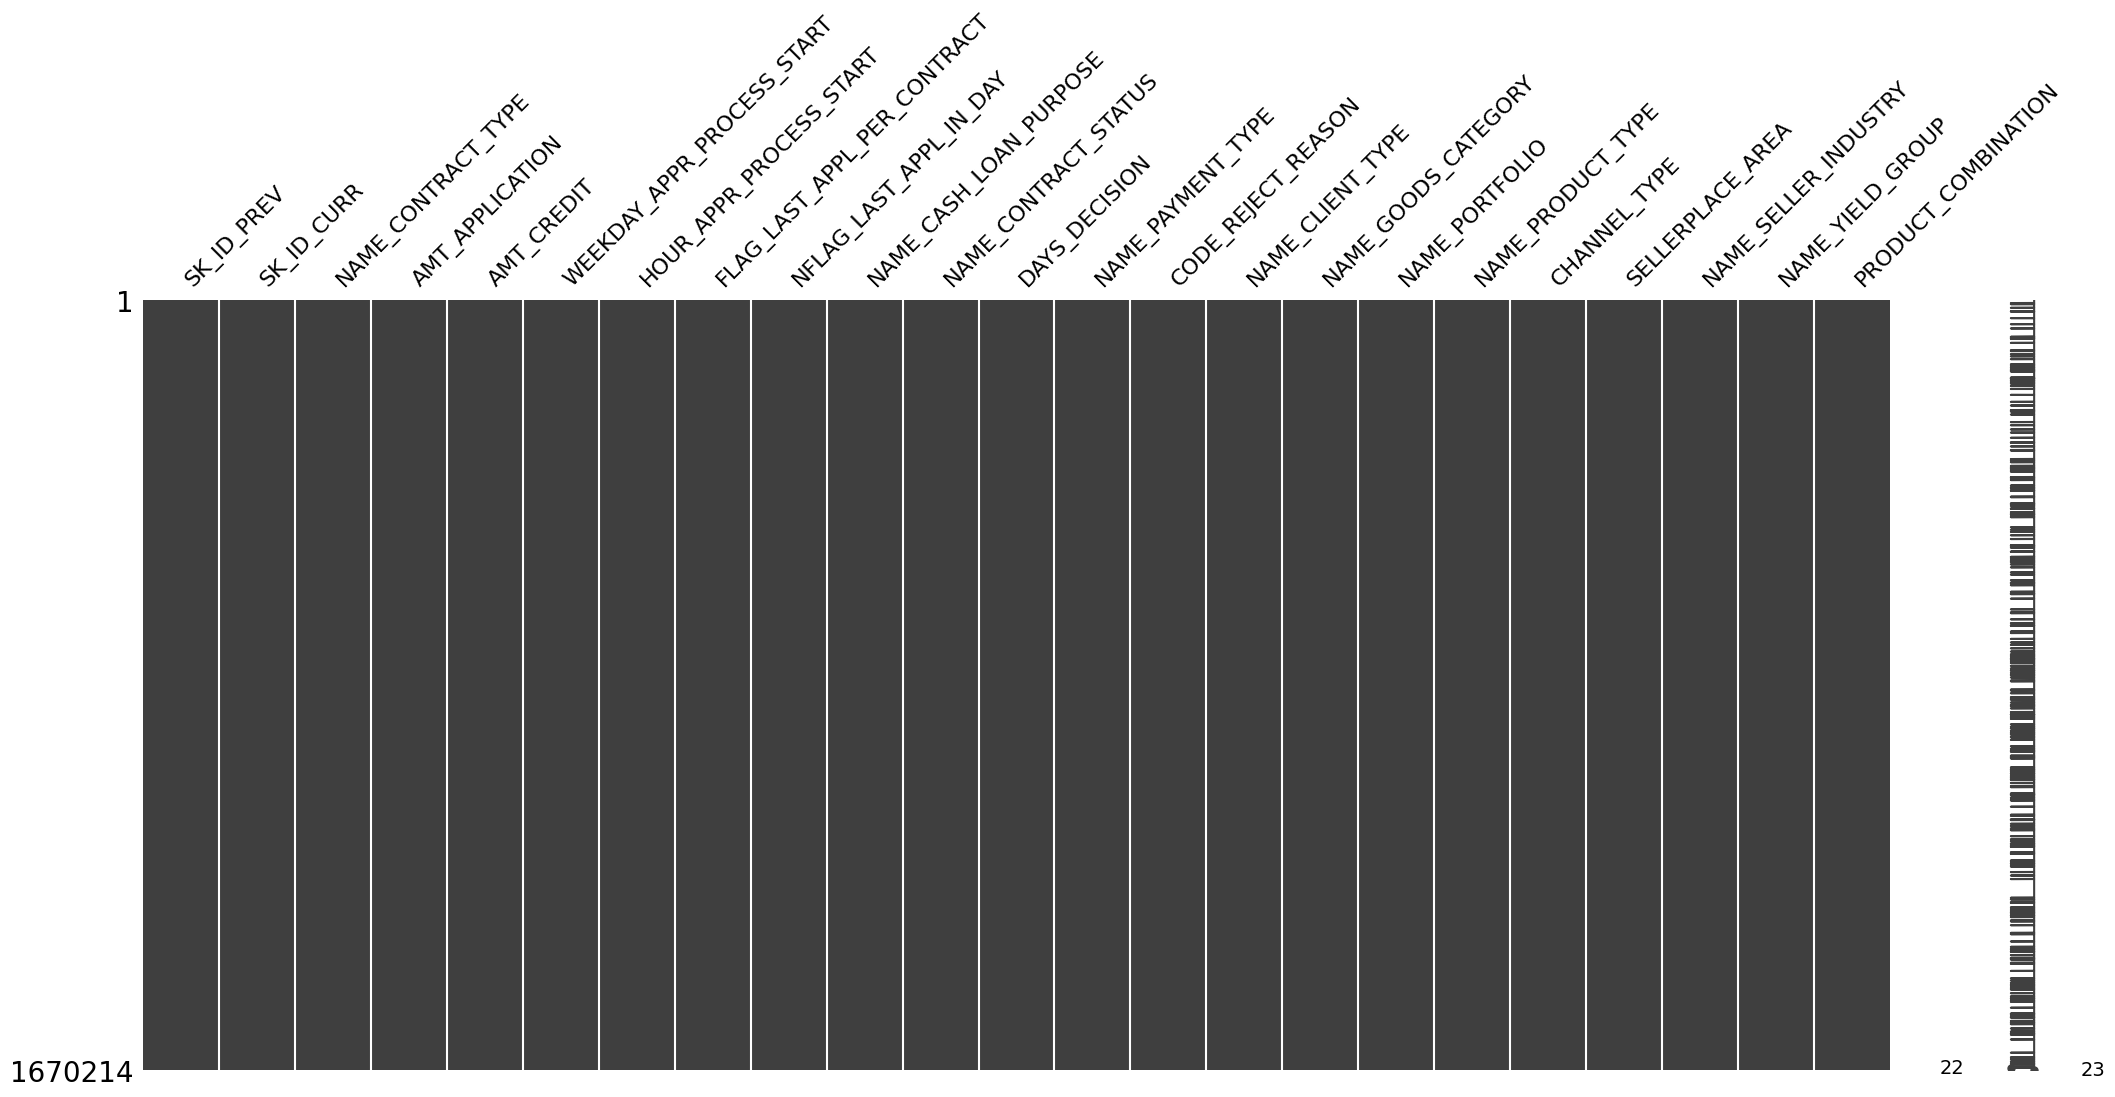

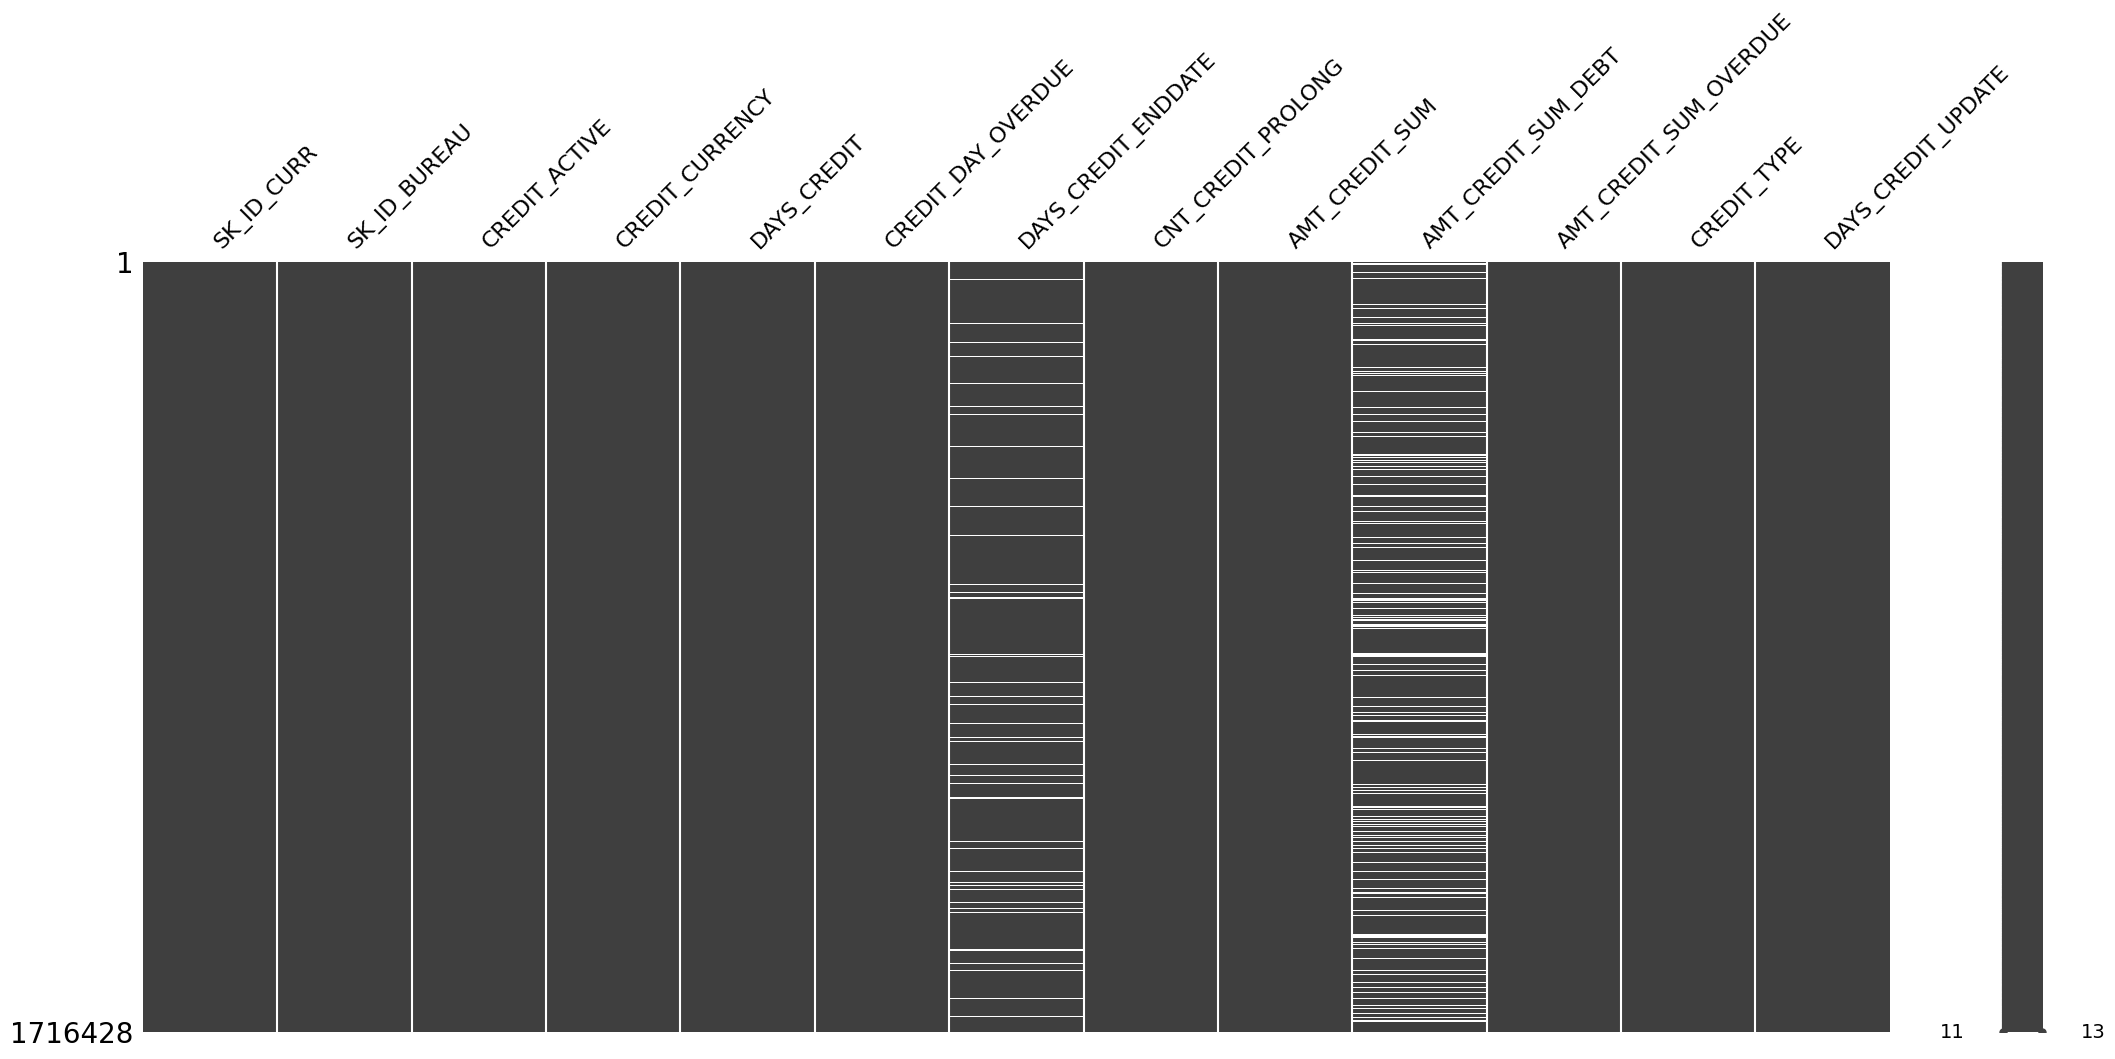

In [105]:
msno.matrix(short_application_train)
msno.matrix(short_previous_application)
msno.matrix(short_bureau)


In [90]:
short_application_train.head()
short_previous_application.head()
short_bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE
0,215354,5714462,Closed,currency 1,-497,0,-153.0,0,91323.0,0.0,0.0,Consumer credit,-131
1,215354,5714463,Active,currency 1,-208,0,1075.0,0,225000.0,171342.0,0.0,Credit card,-20
2,215354,5714464,Active,currency 1,-203,0,528.0,0,464323.5,NaN,0.0,Consumer credit,-16
3,215354,5714465,Active,currency 1,-203,0,NaN,0,90000.0,NaN,0.0,Credit card,-16
4,215354,5714466,Active,currency 1,-629,0,1197.0,0,2700000.0,NaN,0.0,Consumer credit,-21


### colonnes avec une valeur unique

In [95]:
def colonnes_avec_valeur_unique(df):
    """
    Renvoie les noms des colonnes dans un DataFrame qui ont une seule valeur unique dans toutes les lignes.

    Args:
    - df : DataFrame Pandas

    Returns:
    - Liste des noms des colonnes avec une seule valeur unique
    """
    colonnes_valeur_unique = []
    for colonne in df.columns:
        if df[colonne].nunique() == 2:
            colonnes_valeur_unique.append(colonne)
    return colonnes_valeur_unique

# a utiliser plus tard.


In [106]:
dfBaseline = short_application_train.dropna()
dfBaseline.shape

(304531, 65)

##### =========

In [158]:
df_processed = dfBaseline.copy()

In [159]:
X = df_processed.drop(['TARGET','SK_ID_CURR'], axis=1)
y = df_processed[['TARGET']].astype('str')

In [170]:
# Label Encoder pour les colonnes catégorielles avec 2 uniques
label_encoders = {}
for col in X.columns:
    if X[col].dtype == 'object' and X[col].nunique() == 2:
        label_encoders[col] = LabelEncoder()
        X[col] = label_encoders[col].fit_transform(X[col])

In [161]:
# # Suppression des colonnes générées en trop à cause du Label Encoder
# for col, encoder in label_encoders.items():
#     if len(encoder.classes_) == 2:
#         df_processed.drop(col, axis=1, inplace=True)

In [171]:
# One-Hot Encoding pour les colonnes catégorielles avec plus de 2 uniques
for col in X.columns:
    if X[col].dtype == 'object' and X[col].nunique() > 2:
        X = pd.get_dummies(X, columns=[col], drop_first=True)

In [172]:
# StandardScaler pour les colonnes numériques
scaler = StandardScaler()
numerical_cols = X.select_dtypes(include=['int', 'float']).columns
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

In [173]:
X.head()

,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
0,-0.317692,-0.718163,0.662498,-0.577511,0.142236,-0.479832,-0.168913,-0.508045,-0.147811,1.508380,...,False,False,False,False,False,False,False,False,False,False
1,-0.317692,-0.718163,-1.509438,-0.577511,0.425980,1.725606,0.590613,1.601415,-1.253006,-0.166092,...,False,False,False,False,False,False,False,False,False,False
2,3.147706,1.392441,0.662498,-0.577511,-0.425252,-1.155204,-1.408581,-1.093329,-0.782900,-0.689021,...,False,False,False,False,False,False,False,False,False,False
3,-0.317692,-0.718163,0.662498,-0.577511,-0.141508,-0.713367,0.175422,-0.654366,-0.928690,-0.679622,...,False,False,False,False,False,False,False,False,False,False
4,-0.317692,-0.718163,0.662498,-0.577511,-0.198257,-0.215244,-0.364699,-0.069082,0.566438,-0.892140,...,False,False,False,False,False,False,False,False,False,False


In [174]:
y.head()

,TARGET
0,1
1,0
2,0
3,0
4,0


In [175]:
# Séparation des ensembles d'entraînement et de test (80-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [176]:
y_train

,TARGET
13688,0
17947,0
36619,0
193176,0
286374,0
...,...
292132,0
194586,0
137313,0
41342,0


In [177]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

/home/ahmed/.pyenv/versions/3.8.12/envs/e2/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ahmed/.pyenv/versions/3.8.12/envs/e2/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [178]:
y_pred = model.predict(X_test)

In [179]:
classification_rep = classification_report(y_test, y_pred)

In [180]:
print("Rapport de classification :\n", classification_rep)

Rapport de classification :
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     55974
           1       0.27      0.00      0.00      4933

    accuracy                           0.92     60907
   macro avg       0.59      0.50      0.48     60907
weighted avg       0.87      0.92      0.88     60907



['FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY']

In [84]:
# cleanBig = nettoyageCol(bigDF,0.2)

## nettoyage pour base line

In [85]:
# supprimer les nan ou les imputer avec la mediane numerique et le mode categorielles

In [86]:
# encodage

In [87]:
# normalisation

In [88]:
# splitounette

In [89]:
# model